In [3]:
# 1. Circos Installation 
# Prepare an installation script containing the below commands and run within terminal
# After installing, there will be a 'bin' directory which contains module features and 'etc' with default conf files
#
# !/bin/bash
# mkdir circos 
# cd circos 
# curl  http://circos.ca/distribution/circos-0.69-4.tgz | zcat >  circos-0.69-4.tgz
# tar -xvf circos-0.69-4.tgz


In [4]:
! mkdir circos_test 
! cd circos_test
! curl  http://circos.ca/distribution/circos-0.69-4.tgz | zcat >  circos-0.69-4.tgz
! tar -xvf circos-0.69-4.tgz

mkdir: cannot create directory ‘circos_test’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.8M  100 27.8M    0     0  17.0M      0  0:00:01  0:00:01 --:--:-- 17.0M
circos-0.69-4/CHANGES
circos-0.69-4/CITATION
circos-0.69-4/INSTALL
circos-0.69-4/README
circos-0.69-4/README.tools
circos-0.69-4/README.tutorials
circos-0.69-4/README.windows
circos-0.69-4/SUPPORT
circos-0.69-4/TODO
circos-0.69-4/bin/
circos-0.69-4/bin/circos
circos-0.69-4/bin/compile.bat
circos-0.69-4/bin/gddiag
circos-0.69-4/bin/list.modules
circos-0.69-4/bin/test.modules
circos-0.69-4/bin/compile.make
circos-0.69-4/bin/circos.exe
circos-0.69-4/error/
circos-0.69-4/error/configuration.missing.txt
circos-0.69-4/etc/
circos-0.69-4/etc/background.black.conf
circos-0.69-4/etc/background.white.conf
circos-0.69-4/etc/BREWER
circos-0.69-4/etc/brewer.all.conf
circos-0.69-4/etc/brewer.conf
circos-0.69-4

In [5]:
# 2. Example Test Circos
! perl ~/bin/circos-0.69-4/bin/circos -conf ~/bin/circos-0.69-4/example/etc/circos.conf

debuggroup summary 0.41s welcome to circos v0.69-4 17 Dec 2016 on Perl 5.022001
debuggroup summary 0.41s current working directory /home/carneyst/bin/circos-0.69-4
debuggroup summary 0.41s command /home/carneyst/bin/circos-0.69-4/bin/circos -conf /home/carneyst/bin/circos-0.69-4/example/etc/circos.conf
debuggroup summary 0.41s loading configuration from file /home/carneyst/bin/circos-0.69-4/example/etc/circos.conf
debuggroup summary 0.41s found conf file /home/carneyst/bin/circos-0.69-4/example/etc/circos.conf
debuggroup summary 0.70s debug will appear for these features: output,summary
debuggroup summary 0.70s bitmap output image ./circos.png
debuggroup summary 0.70s SVG output image ./circos.svg
debuggroup summary 0.70s parsing karyotype and organizing ideograms
debuggroup summary 0.86s karyotype has 66 chromosomes of total size 8,540,079,869
debuggroup summary 0.88s applying global and local scaling
debuggroup summary 0.96s allocating image, colors and brushes
debuggroup summary 1.5

In [3]:
# 3. Getting your genome txt files 
# Create a 'karyotype' directory within circos-0.69-4/data directory to save all species genome 
# i.e. karyotype.human.hg38.txt

In [4]:
# 4. Setting up configuration files 
# Create a 'template' directory within your circos-0.69-4
# Then create both a data and etc directory 
# data will contain your .bed files coresponding to each cell type based on the TAD boundaries

# etc will contain the below required configuration files 
# ****Required*****
# bands.conf -marks the boundary of genes
# genenames.template.conf -the sense and anti-sense locations of genes and lncRNAs within the genome
# gene.template.conf -where to place the locations on the plot for genes and lncRNAs 
# ideogram.conf -relative spacing
# ideogram.label.conf -labeling the chromosome location
# ideogram.position.conf -where to place the ideogram information on the plot, defining spatial distance
# image.generic.conf -image size in pixel range of radius and direction of how data appears, counter/clockwise 
# tiles.new.conf -size of ticks and their placement

# ****Main Script circo.conf***
# This file has embedded commands to call upon the above files.
# Will act as the input for the perl command.



In [13]:
# 5. Data Formatting
# ****Converting xlsx to csv*** (TADs.xlsx.csv.py)

#!/usr/bin/python 
# import openpyxl #opens excel workbook in python script format
# import csv

# wb = openpyxl.load_workbook('mmc4.xlsx')

# sh = wb['GM12878'] #taking all the values from the workbook sheet in the excel
# with open('GM12878.TADS.csv', 'wb') as f: #the new file name that will be written
    # c = csv.writer(f) #then converts those variables to a csv format
    # for r in sh.rows: #for every row in the excel to copy to the new .csv file
        # c.writerow([cell.value for cell in r])
        # ......
        
# ****Converting csv to bed*** (TADs.circos.sh)
# The data has to be organized as 'hs1' instead of 'chr1' format for circos to recognize the genomic regions 
# Separate the string settings to a tabular setting 
# Then save the output as a bed format with start and end coordinates in the second and third columns

#!/bin/bash  
# cat AD.TADS.csv | sed -e 's/chr/hs/g' | sed -e 's/,/\t/g' > AD.TADS.bed
# .... 

TAD = open("/home/carneyst/bin/circos-0.69-4/template/data/AD.TADS.bed", "r")

print "Chr # \t Start \t End"
i = 1
while i <= 3:
    line = TAD.readline()
    print line
    i += 1


Chr # 	 Start 	 End
hs10	4880000	4920000

hs10	6000000	6040000

hs10	7760000	7800000



In [42]:
# 6. Generating circos plot 
# Run the perl command within home/carneyst(your username)/bin/circos-0.69-4/template/etc 
# -param allows you to change the default setting for both the chromosome and location range you would like to look at...
# by setting the start and end coordinates
# Both the .svg and .png version of the plot will be saved within the current directory

# perl /home/carneyst/bin/circos-0.69-4/bin/circos -param chrom=hs14 -param chromstart=50 -param chromend=51 -conf circos.conf
# inkview template.hs14\:50-51Mb.png


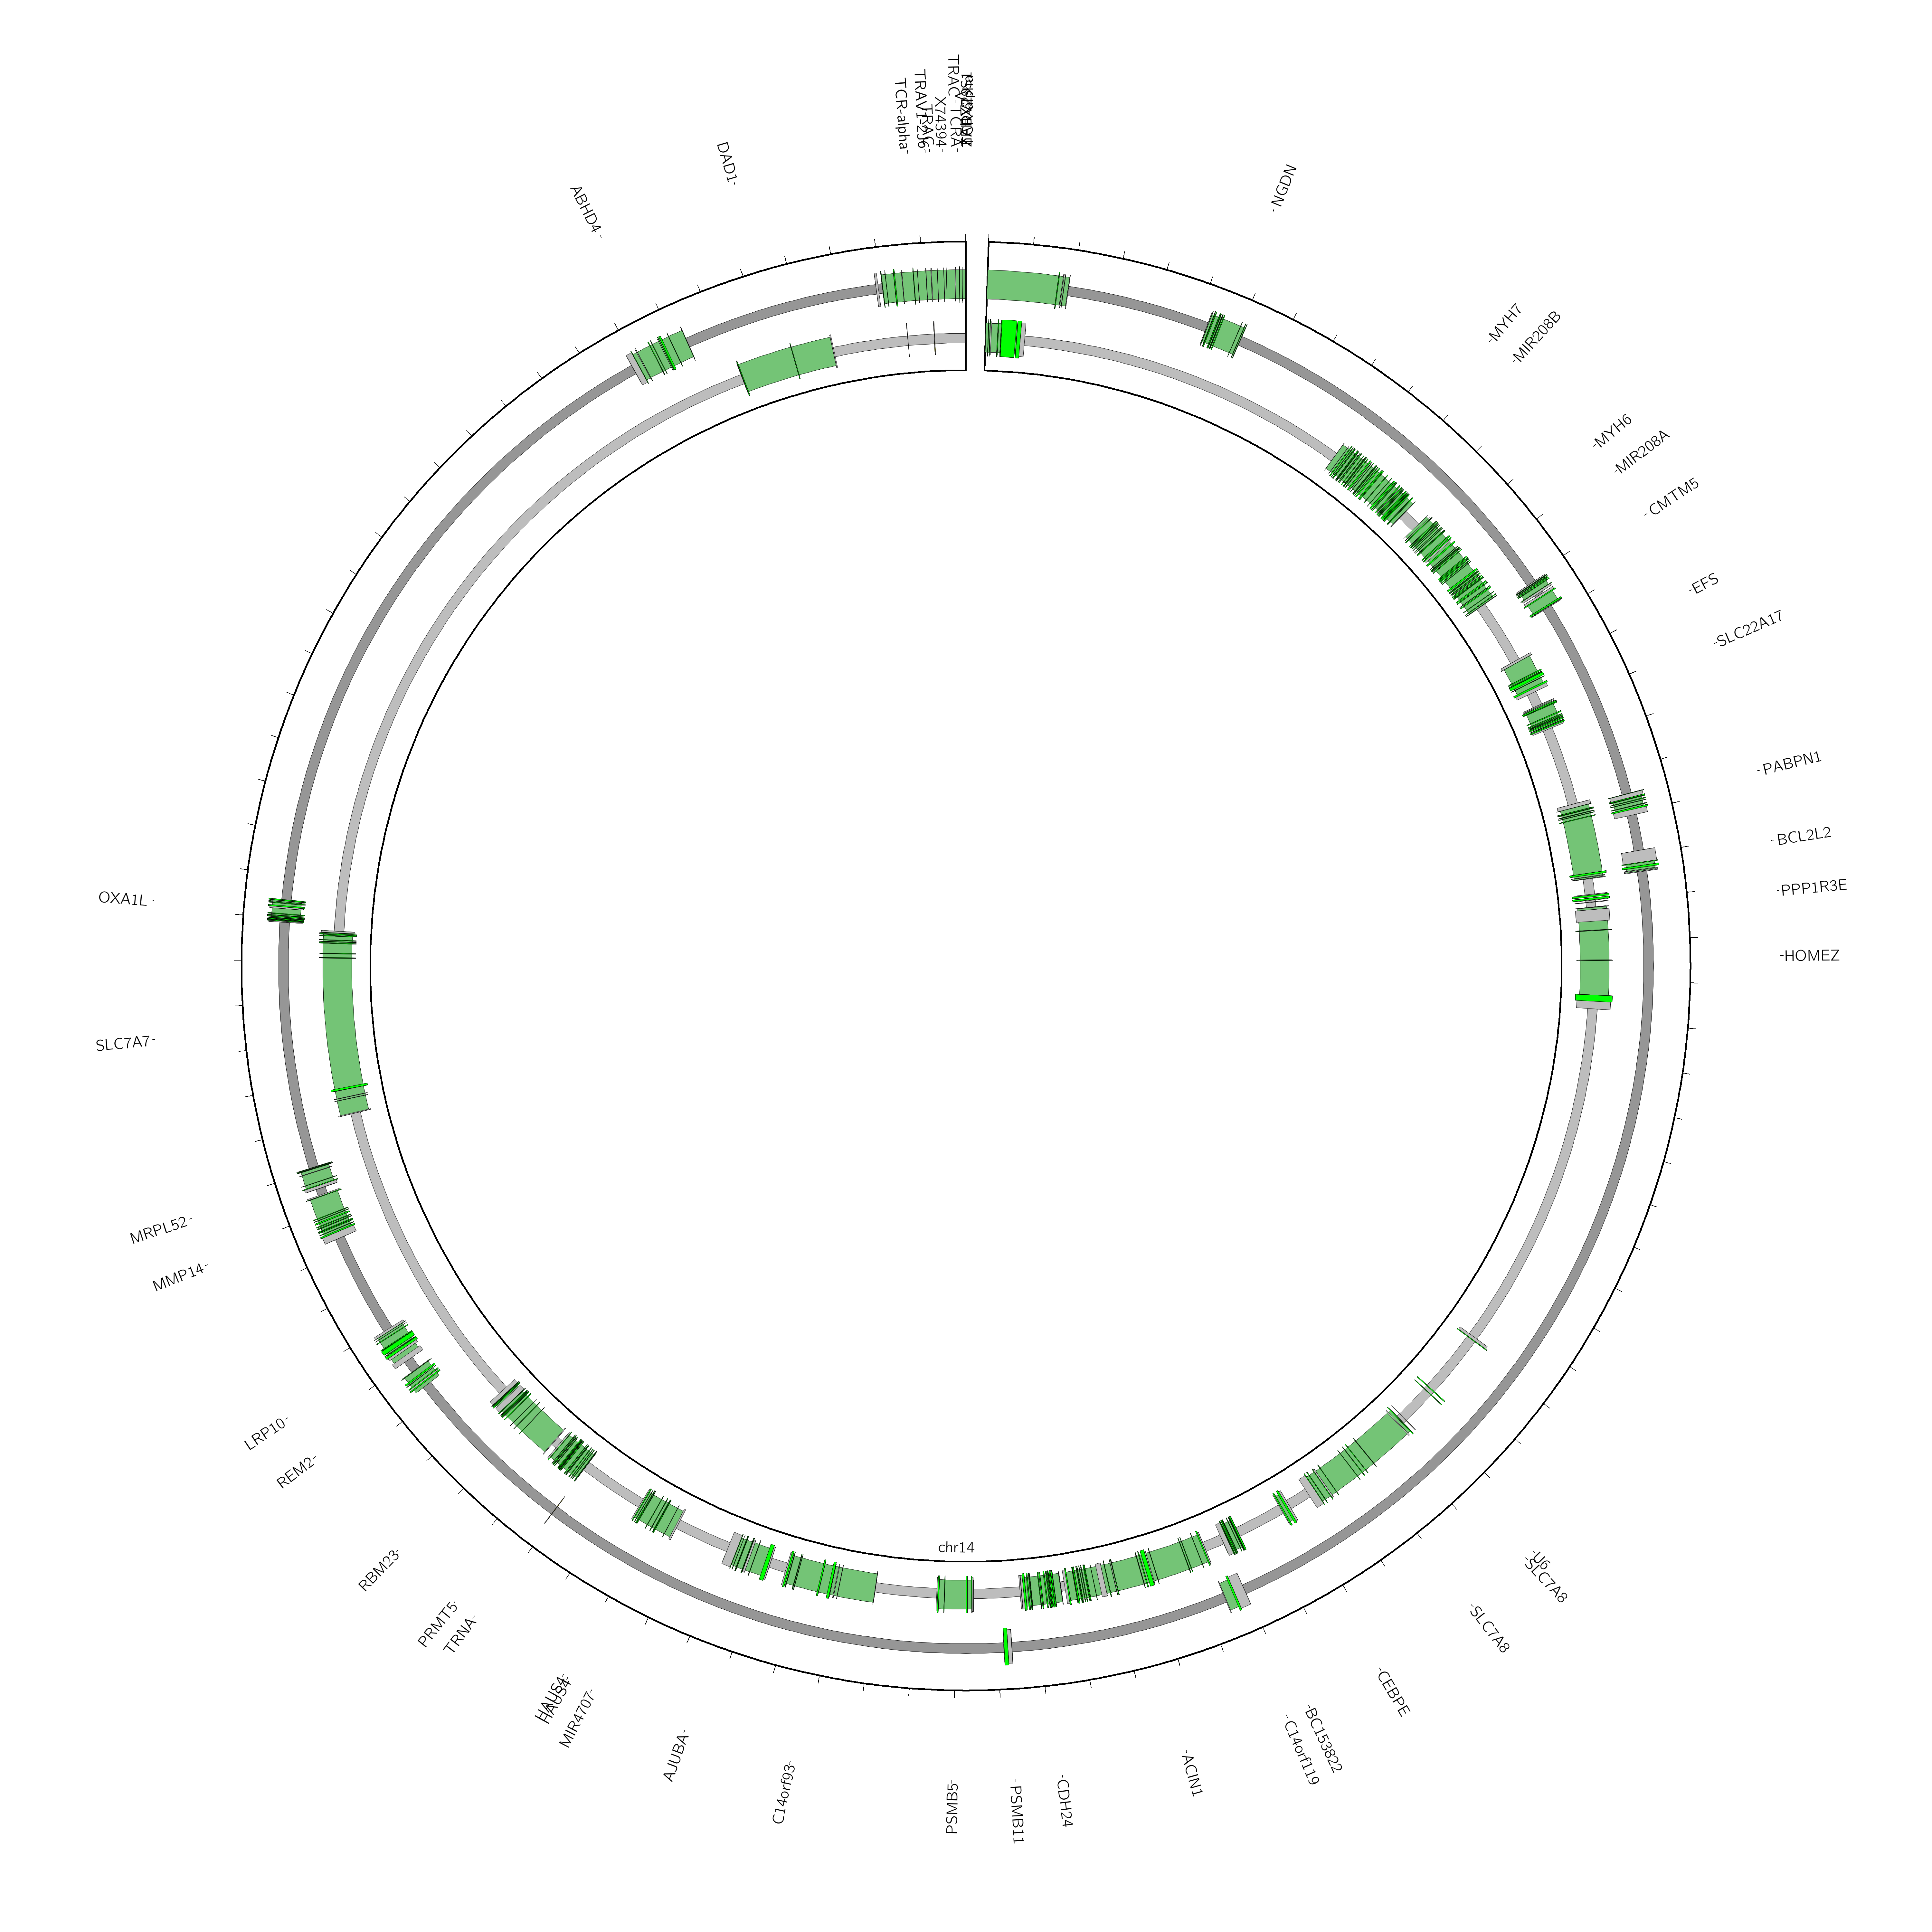

In [33]:
from IPython.display import Image
circos_plot_example = Image('/home/carneyst/bin/circos-0.69-4/template/etc/template.hs14:23-24Mb.png', width=800, height=800)
circos_plot_example